In [1]:
%run ../_config/config.py # Import the configuration settings
import logging

import cmdstanpy

cmdstanpy.utils.get_logger().setLevel(logging.ERROR)
import bambi as bmb

In [2]:
df = pd.read_csv('../data/Howell_18.csv')

Text(0, 0.5, 'Height')

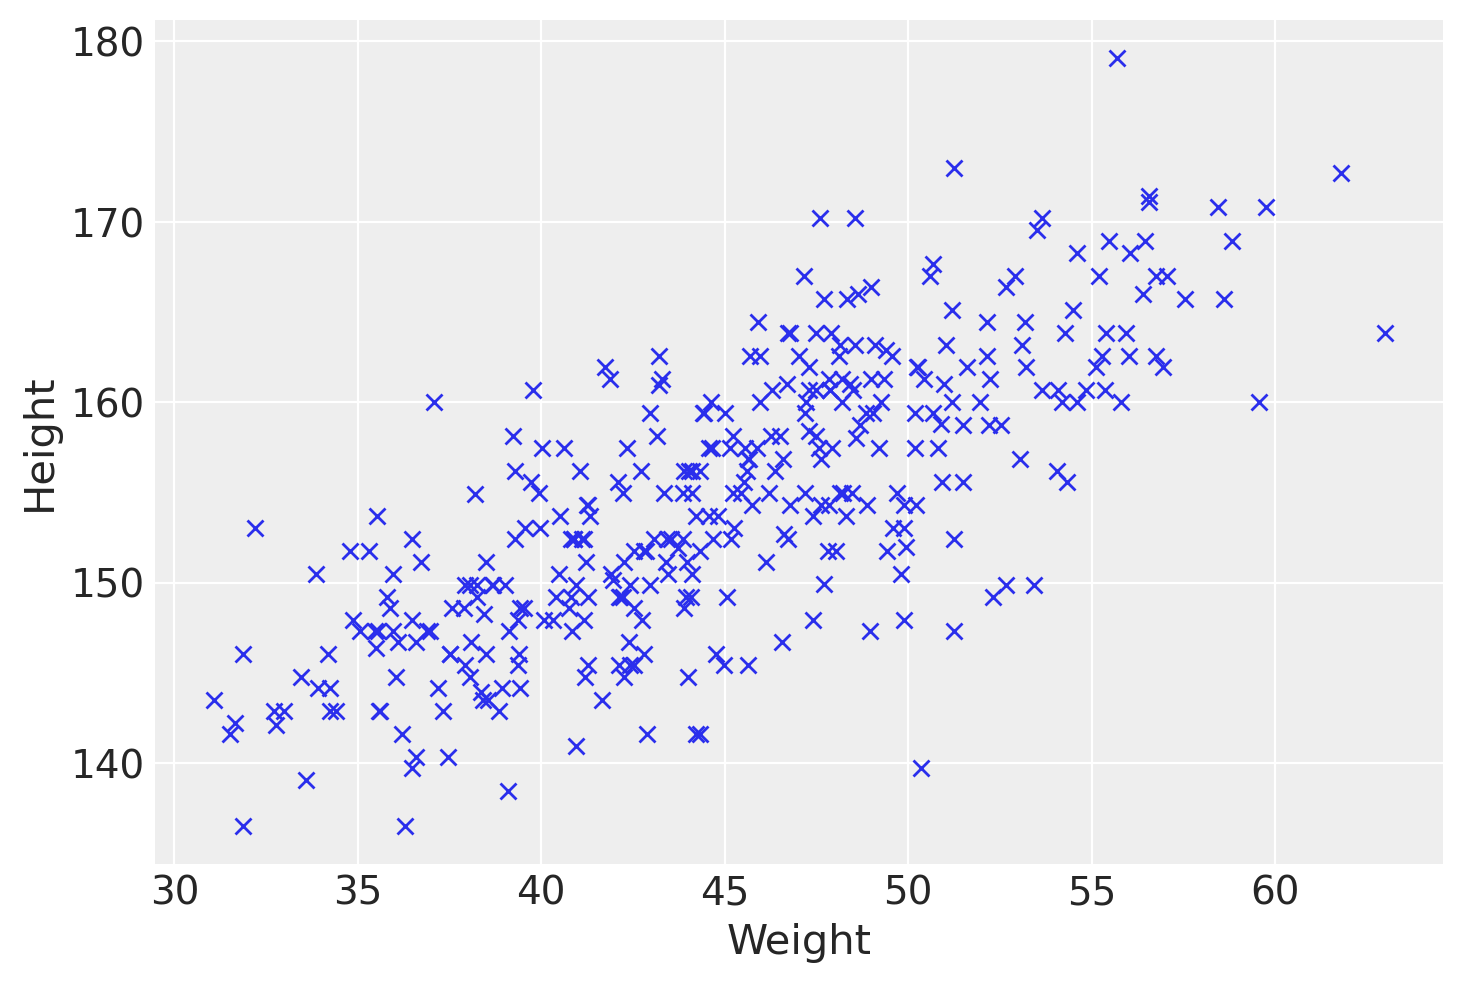

In [3]:
plt.plot(df["weight"], df["height"], "x")
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
df["weight_c"] = df["weight"] - np.mean(df["weight"])

model = bmb.Model("height ~ weight_c", df)

In [5]:
print(model)

       Formula: height ~ weight_c
        Family: gaussian
          Link: mu = identity
  Observations: 352
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 154.5971, sigma: 19.3283)
            weight_c ~ Normal(mu: 0.0, sigma: 2.9978)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 7.7313)


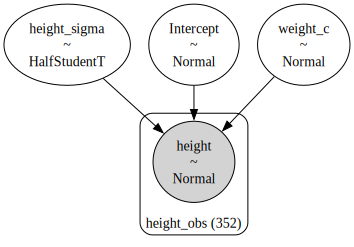

In [6]:
model.build()
model.graph()

In [7]:
idata = model.fit(
    nuts_sampler="numpyro",
    idata_kwargs={"log_likelihood": True}
)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

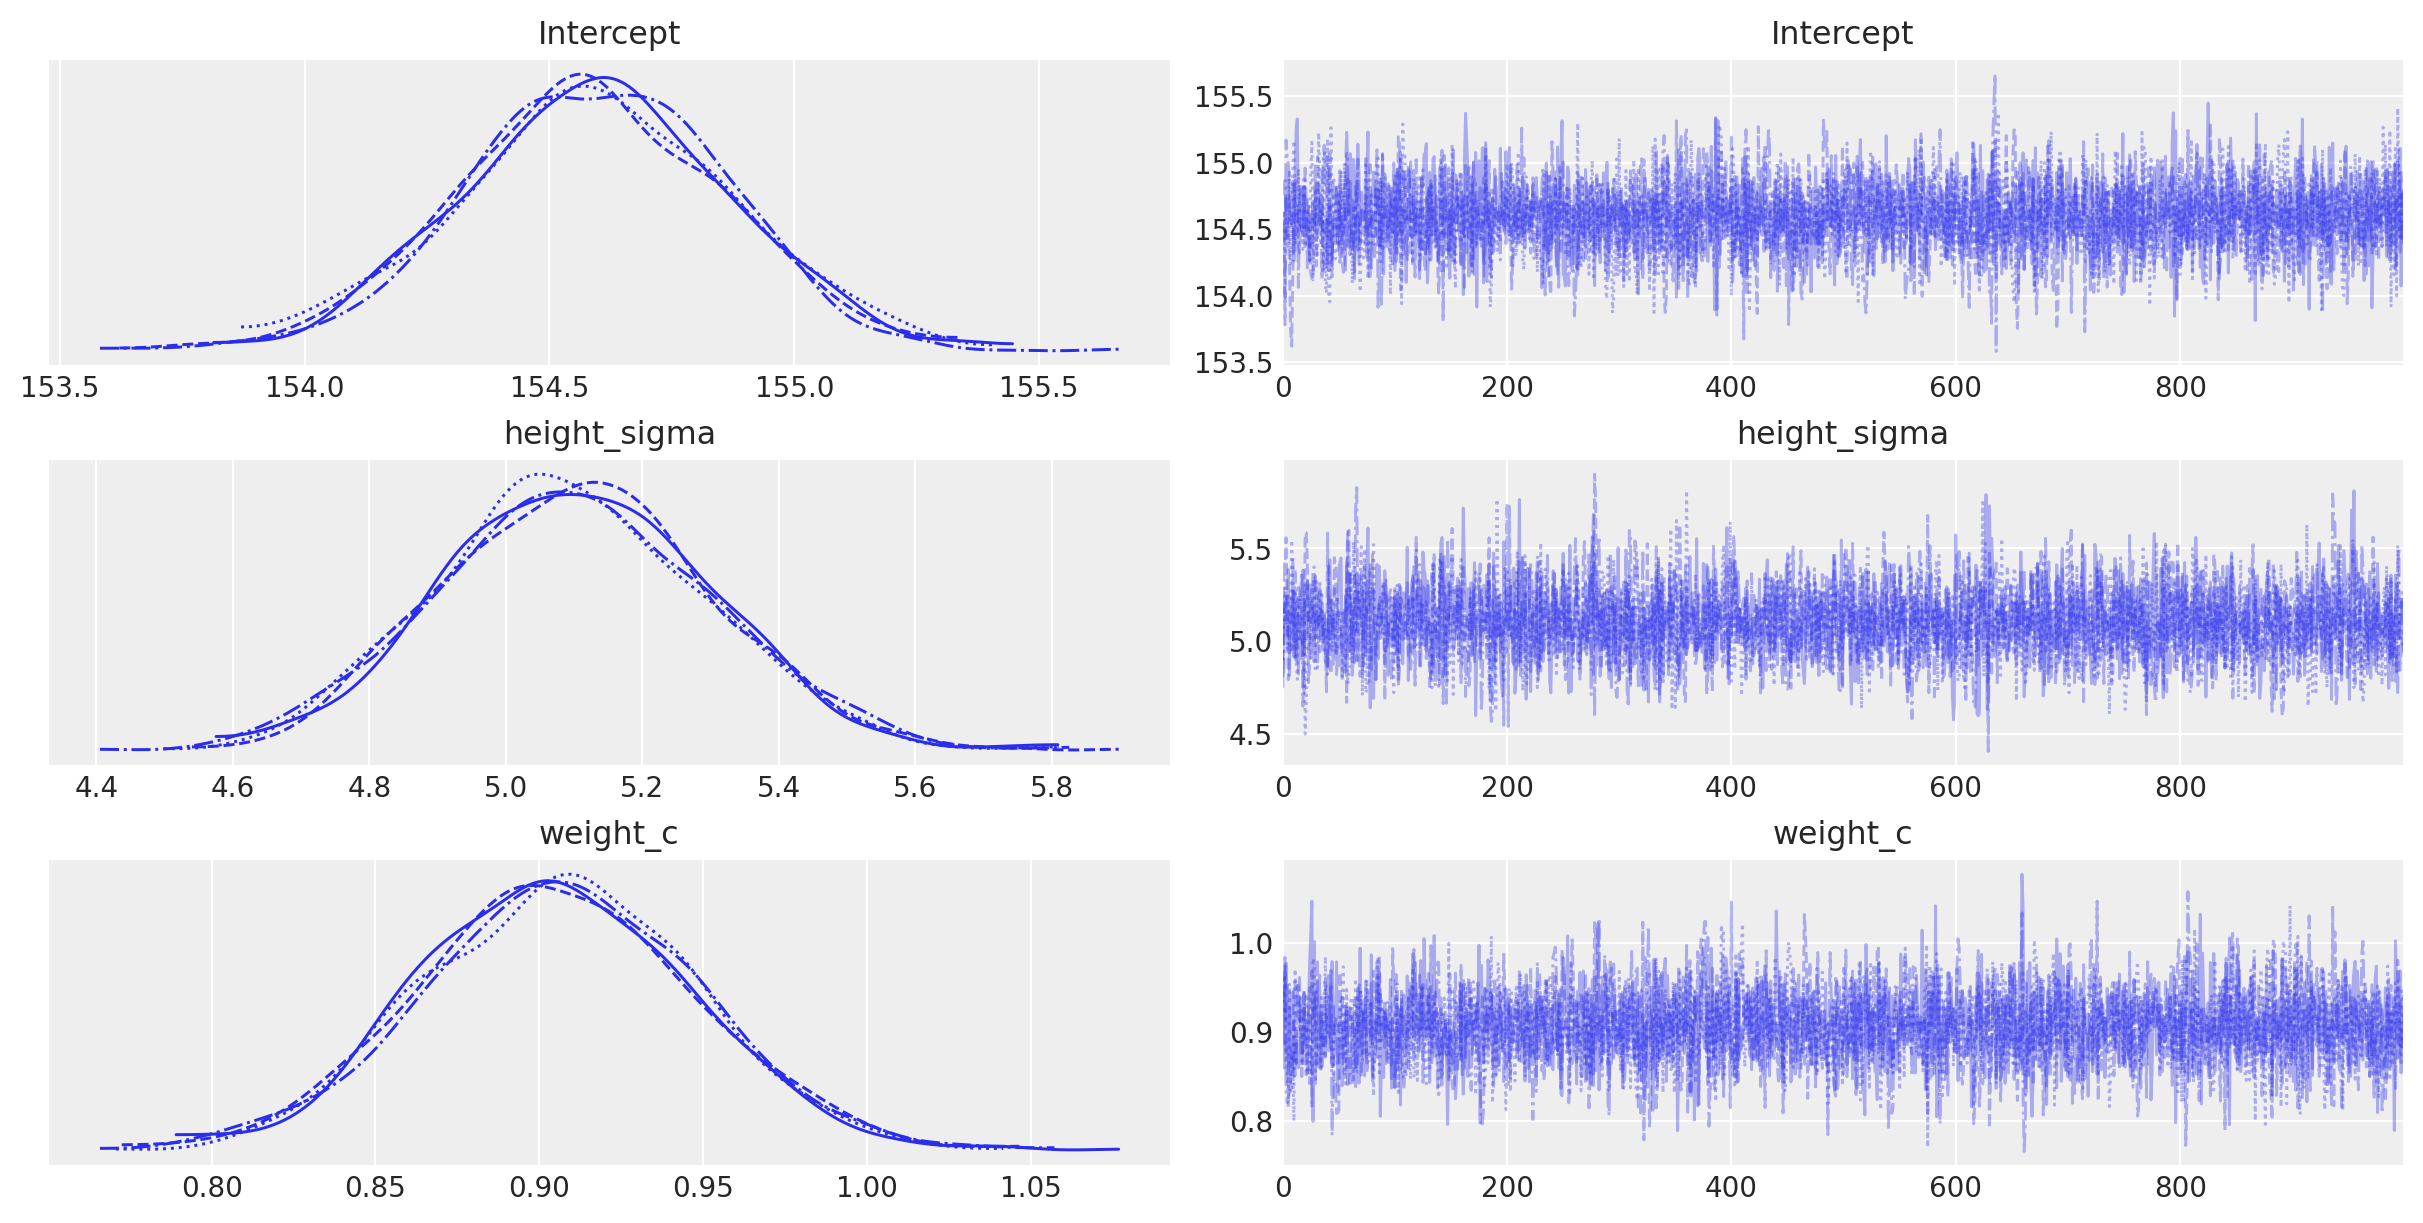

In [8]:
_ = az.plot_trace(idata)

In [9]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,154.59,0.27,154.06,155.08,0.0,0.0,4702.31,2889.65,1.0
height_sigma,5.10,0.20,4.72,5.46,0.0,0.0,4241.08,2884.71,1.0
weight_c,0.91,0.04,0.83,0.99,0.0,0.0,4037.20,2604.30,1.0


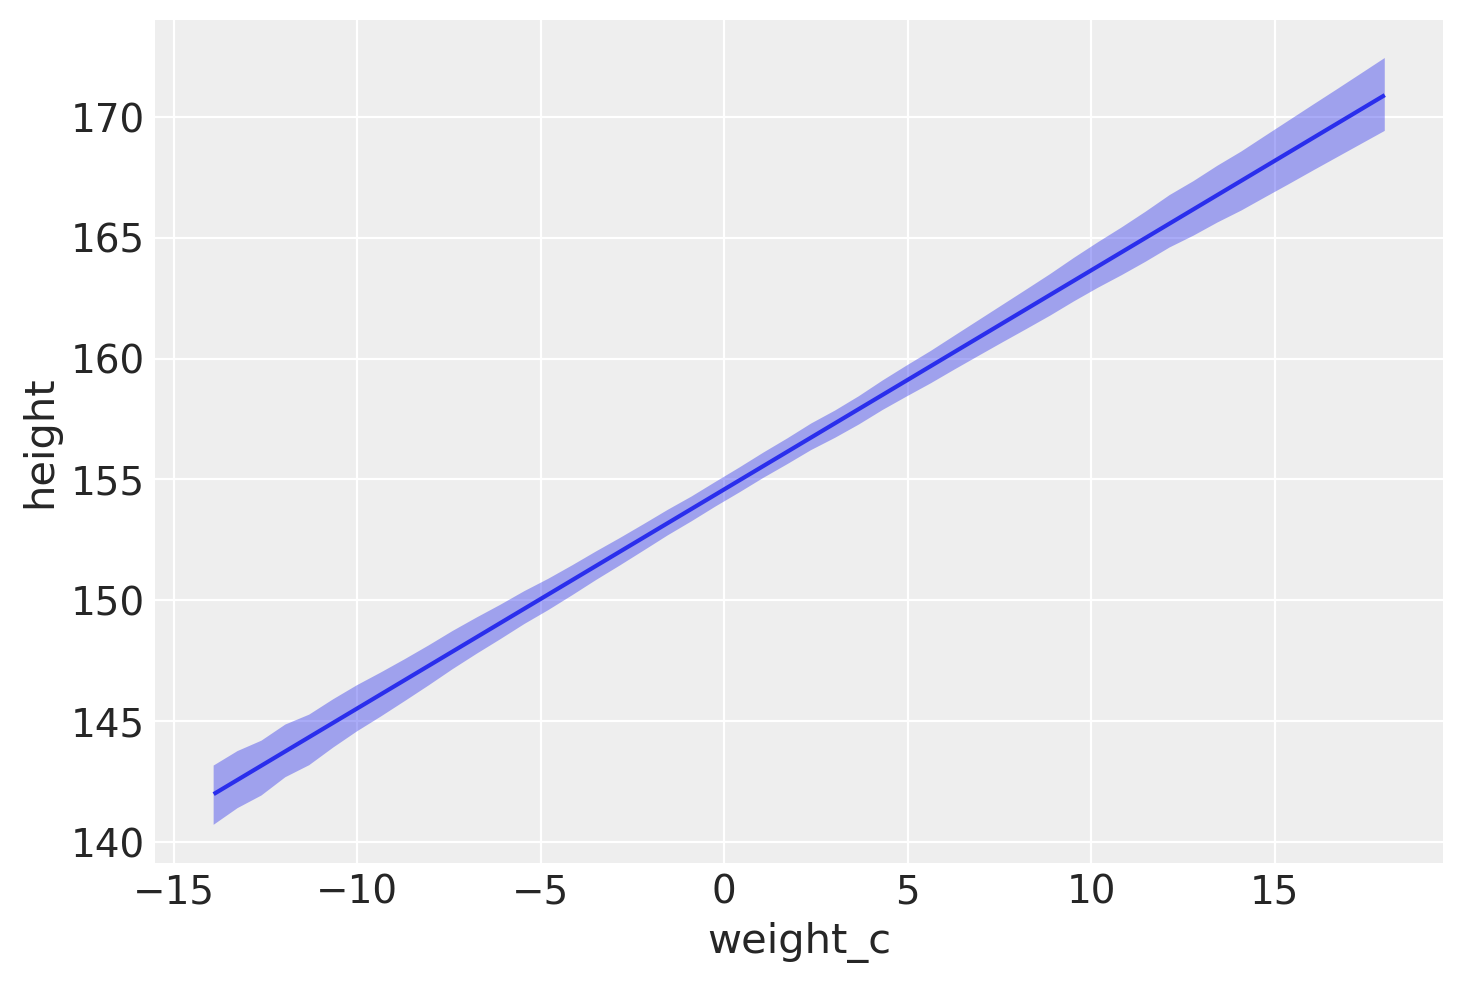

In [10]:
bmb.interpret.plot_predictions(model, idata, ["weight_c"]);

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w -m 

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

logging   : 0.5.1.2
matplotlib: 3.8.4
cmdstanpy : 1.2.3
pandas    : 2.2.2
arviz     : 0.18.0
numpy     : 1.26.4
bambi     : 0.13.0

Watermark: 2.4.3

